In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv(r"E:\CreditCardDefaultPrediction\notebooks\data\UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df["ID"].unique()

array([    1,     2,     3, ..., 29998, 29999, 30000], dtype=int64)

In [5]:
df.drop(["ID"],axis=1,inplace=True)

In [6]:
df.shape

(30000, 24)

In [7]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<Axes: >

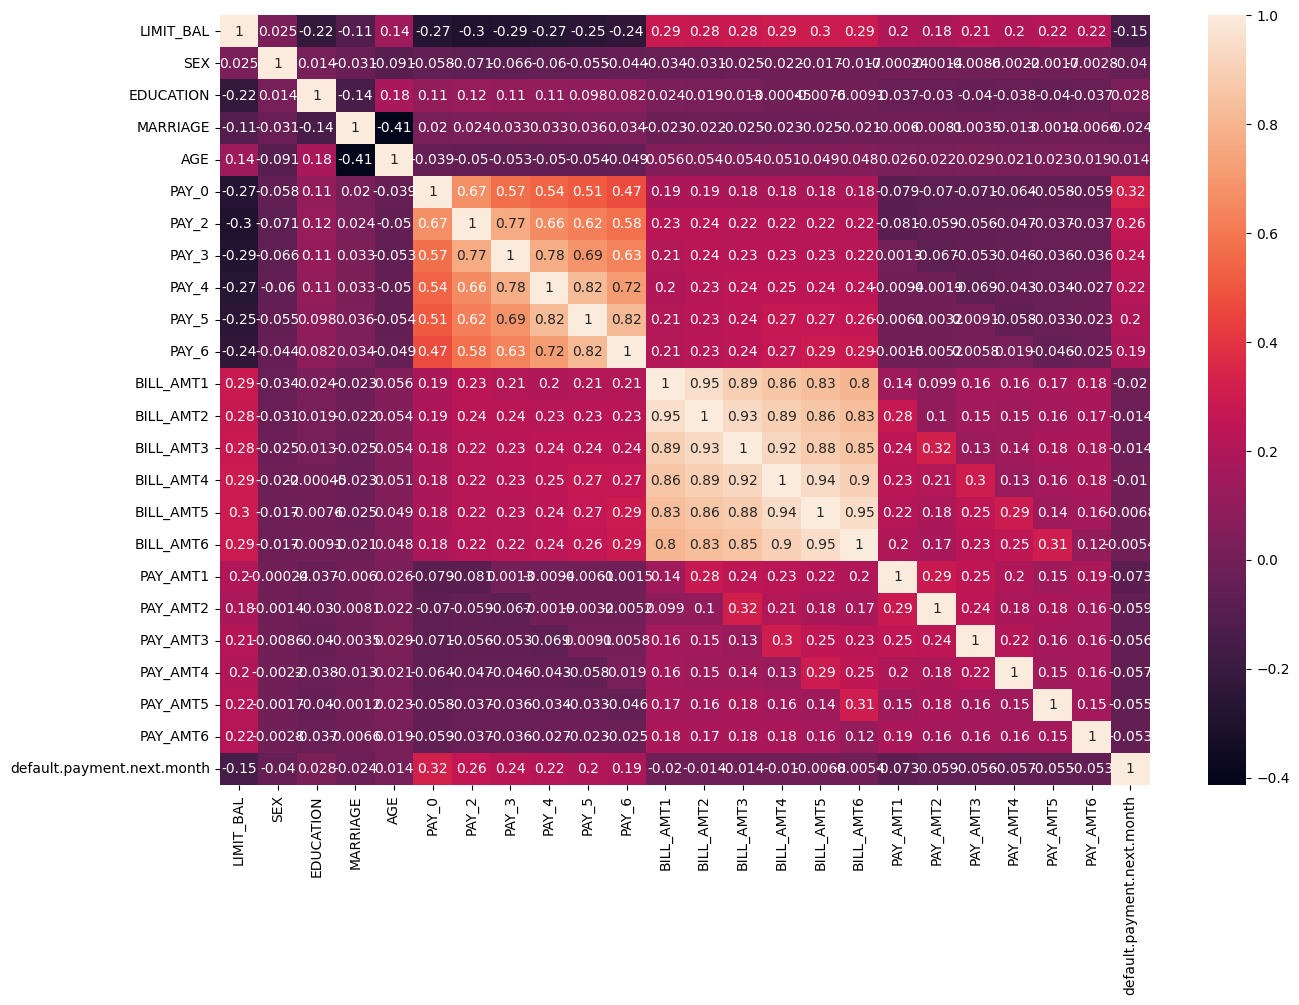

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [9]:
x=df.drop(["default.payment.next.month"],axis=1)
y=df["default.payment.next.month"]

In [10]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [11]:
numeric_features=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
    'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
    'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [12]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    
])

In [13]:
transformer = ColumnTransformer(
                transformers=[
                    ('trf2',StandardScaler(),numeric_features),
    ],remainder='passthrough'
                        ) 

In [14]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf2', StandardScaler(),
                                 ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
                                  'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                                  'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6'])])

In [15]:
input_train,input_test,target_train,target_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
train_array = np.c_[transformer.fit_transform(input_train), target_train]
test_array = np.c_[transformer.transform(input_test), target_test]

In [17]:
train_array[1]

array([-1.13798895, -1.24273303,  0.18632812,  0.86186013, -1.24598349,
        0.0151155 ,  0.11219202,  0.14353684,  0.19102107,  0.2353796 ,
        0.25210761, -0.479349  , -0.45244454, -0.16873342, -0.44169182,
       -0.38346725, -0.41792304, -0.25477086, -0.15639766, -0.06672164,
        0.07071835, -0.0542719 , -0.28596935,  0.        ])

In [18]:
models = {     
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNeighbors":KNeighborsClassifier(n_neighbors=5,algorithm="auto"),
    "GaussianNB":GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "XGB Classifier": XGBClassifier('binary:logistic'),
            }

c:\Users\Abhi\anaconda3\Lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


In [19]:
params={
    "Logistic Regression":{
    # "penalty":['l2', 'elasticnet'],
    },
    
    
    "Decision Tree":{
        "criterion":['gini', 'entropy', 'log_loss'],
        # "splitter":['best', 'random'],
        # "max_depth":[5,10,15]
    },
    
    "KNeighbors":{
        "n_neighbors":[1,2,3,4,5], 
        # "p":[2],
        

    },
    
    
    "GaussianNB":{
        "var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]
    },
    
    
    
    "Random Forest":{
            
            "criterion":['gini','entropy','log_loss'],
            "max_depth":[5,10,15],
            "max_features":['sqrt', 'log2', None],
    
    },
    
    
    
    "XGB Classifier":{
        "n_estimators": [50,100, 130],
        # 'learning_rate':[.1,.01,.05,.001],
        # 'n_estimators': [8,16,32,64,128,256],
        "max_depth": range(3, 11, 1),
        "random_state":[0,50,100]
    }
    
}

In [20]:
X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [21]:
len(X_train[1])

23

In [22]:
from sklearn.model_selection import GridSearchCV
def get_best_model(X_train,y_train,X_test,y_test,model_dict,params_,base_accuracy=0.7):
    models = model_dict.keys()
    for model in models:
        print(f'Initial base accuracy is {base_accuracy}')
        print(20*'*',"Estimator: ",model,20*'*')
        gs = GridSearchCV(estimator=model_dict[model],param_grid=params_[model],cv=3)
        gs.fit(X_train,y_train)
        print(f'Best parameters are :{gs.best_params_} With accuracy score:{gs.best_score_}')
        
        clasifier = model_dict[model].set_params(**gs.best_params_)
        clasifier.fit(X_train,y_train)

        y_train_pred = clasifier.predict(X_train)
        y_test_pred = clasifier.predict(X_test)
        
        train_model_score = accuracy_score(y_train, y_train_pred)

        test_model_score = accuracy_score(y_test, y_test_pred)
        
        if test_model_score >= base_accuracy:
            print('Acceptabel model found!')
            base_accuracy = test_model_score
            best_model = {model:clasifier}
        else:
            print('Model rejected\n',30*'__',"\n")
            
    
    print(f"Best model is:{list(best_model.keys())} with accuracy Score: {round(test_model_score,2)}")        
    return best_model

In [23]:
get_best_model(X_train,y_train,X_test,y_test,model_dict=models,params_=params)

Initial base accuracy is 0.7
******************** Estimator:  Logistic Regression ********************
Best parameters are :{} With accuracy score:0.8110666666666667
Acceptabel model found!
Initial base accuracy is 0.8090666666666667
******************** Estimator:  Decision Tree ********************
Best parameters are :{'criterion': 'entropy'} With accuracy score:0.7319555555555555
Model rejected
 ____________________________________________________________ 

Initial base accuracy is 0.8090666666666667
******************** Estimator:  KNeighbors ********************
Best parameters are :{'n_neighbors': 4} With accuracy score:0.7935111111111112
Model rejected
 ____________________________________________________________ 

Initial base accuracy is 0.8090666666666667
******************** Estimator:  GaussianNB ********************
Best parameters are :{'var_smoothing': 0.5} With accuracy score:0.7918222222222222
Model rejected
 ___________________________________________________________

{'Random Forest': RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None)}

In [24]:
xgb_new=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
model.fit(X_train, y_train)


NameError: name 'model' is not defined

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_test

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
7495,0.0
7496,0.0
7497,1.0
7498,1.0


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred)

0.8213333333333334